In [13]:
from sklearn.datasets import load_wine
wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [14]:
X, y = wine.data, wine.target
X.shape, y.shape, set(y)

((178, 13), (178,), {0, 1, 2})

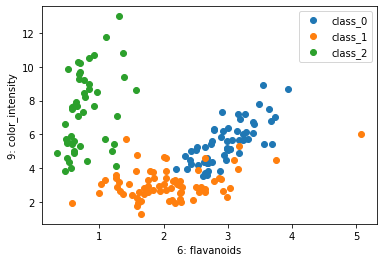

In [15]:
import matplotlib.pyplot as plt
i,j = 6,9
plt.xlabel(f"{i}: {wine.feature_names[i]}")
plt.ylabel(f"{j}: {wine.feature_names[j]}")
for k in set(y):
    plt.plot(X[:,i][y==k], X[:,j][y==k], "o", label=f"{wine.target_names[k]}")
plt.legend()
plt.show()

In [16]:
X69 = X[:, [6,9]]
X69.shape

(178, 2)

In [17]:
import numpy as np
class vizinho():
    def fit(self, X, y):
        self.X = X
        self.y = y
    def distancia(self, X):
        diferenca = self.X - X
        quadrado = diferenca ** 2
        soma = np.sum(quadrado, axis=1)
        raiz = np.sqrt(soma)
        return raiz
    def predict(self, X):
        ypred = np.empty((X.shape[0],))
        for i in range(X.shape[0]):
            distancias = self.distancia(X[i])
            vizinho = np.argmin(distancias)
            ypred[i] = self.y[vizinho]
        return ypred

In [18]:
from sklearn.metrics import accuracy_score
modelo = vizinho()
modelo.fit(X, y)
ypred = modelo.predict(X)
acuracia = accuracy_score(y, ypred)
acuracia

1.0

In [19]:
ntreino = int(len(y)*0.7)
X_treino, X_teste = X[:ntreino], X[ntreino:]
y_treino, y_teste = y[:ntreino], y[ntreino:]
X_treino.shape, X_teste.shape

((124, 13), (54, 13))

In [20]:
from sklearn.metrics import accuracy_score
modelo = vizinho()
modelo.fit(X_treino, y_treino)
ypred = modelo.predict(X_teste)
acuracia = accuracy_score(y_teste, ypred)
acuracia

0.1111111111111111

In [21]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [22]:
y_treino

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
y_teste

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.metrics import accuracy_score
modelo = vizinho()
modelo.fit(X_treino, y_treino)
ypred = modelo.predict(X_teste)
acuracia = accuracy_score(y_teste, ypred)
acuracia

0.7796610169491526

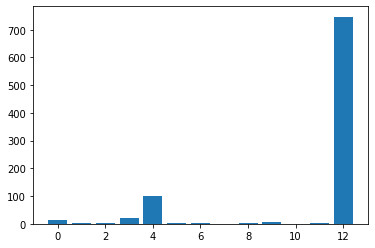

In [30]:
import matplotlib.pyplot as plt
plt.bar(list(range(X.shape[1])), np.mean(X, axis=0))
plt.show()

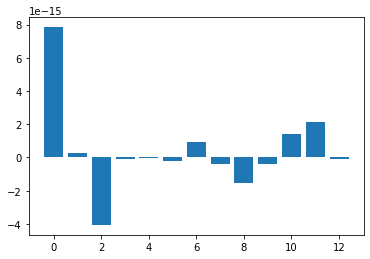

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_new = scaler.fit_transform(X)

import matplotlib.pyplot as plt
plt.bar(list(range(X_new.shape[1])), np.mean(X_new, axis=0))
plt.show()

In [56]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
import numpy as np

modelo = LogisticRegression()
scores = cross_validate(modelo, X, y)
sempad = np.mean(scores['test_score'])
print(f"Sem padronização: {sempad}")

Sem padronização: 0.9555555555555555


In [57]:
scores = cross_validate(modelo, X_new, y)
compad = np.mean(scores['test_score'])
print(f"Com padronização: {compad}")

Com padronização: 0.9888888888888889


In [58]:
from sklearn.pipeline import Pipeline

modelo = Pipeline([
    ("padronização", scaler),
    ("knn", LogisticRegression())
])
scores = cross_validate(modelo, X_new, y)
aninha = np.mean(scores['test_score'])
print(f"Com padronização aninhada: {aninha}")

Com padronização aninhada: 0.9831746031746033


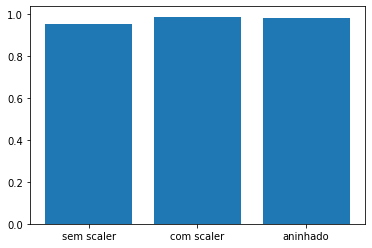

In [69]:
import matplotlib.pyplot as plt
colunas = ['sem scaler', 'com scaler', 'aninhado']
plt.bar(colunas, [sempad, compad, aninha])
plt.show()

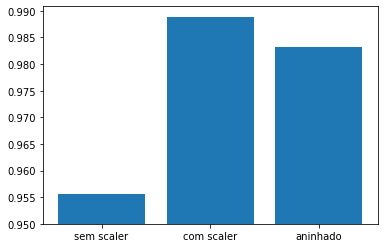

In [70]:
import matplotlib.pyplot as plt
plt.bar(colunas, np.array([sempad, compad, aninha])-0.95, bottom=0.95)
plt.show()